# Polynomial Regression

Linear Regression is not useful to represent all relations. Linear Regression can only represent relations of first order polynomial (degree of x = 1).  

In `Polynomial Regression` the relationship between the independent variable `x` and the dependent variable `y` is modelled as an `nth degree polynomial in x`. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

We will stick to the same example of marketing and sales relation from previous notebook on linear regression.

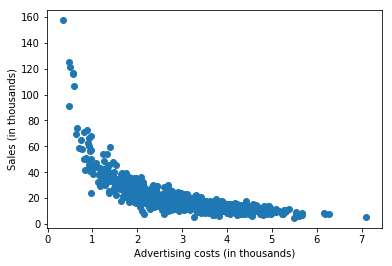

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(2)
marketing = np.random.normal(3.0, 1.0, 1000)
sales = np.random.normal(50.0, 10.0, 1000) / marketing

plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.scatter(marketing, sales)
plt.show()

### Numpy provides a polyfit function that allows us to construct n-th degree polynomial model to our data.
It takes in following arugments:
    - x: (array-like) x-coordinates of M sample points 
    - y: (array-like) y-coordinates of M sample points 
    - deg: degree of the fitting polynomial
  as the polyfit returns an ndarray, we use poly1d to encapsulate data in one-dimensional polynomial.

In [2]:
x = np.array(marketing)
y = np.array(sales)

polyplot = np.poly1d(np.polyfit(x,y,4))

### Now let's visualize the data

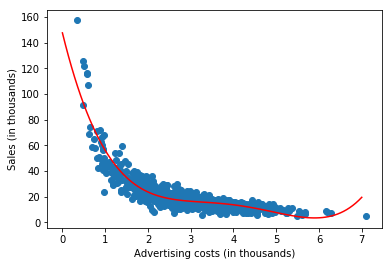

In [3]:
plt.scatter(marketing, sales)

# we will replace the independant variable marketing with sample points (x_range) in its bounds using np.linspace

x_range = np.linspace(0, 7, 100)
plt.plot(x_range, polyplot(x_range), c='r')

plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.show()

This looks good, now lets check the fit using r-squared measure

In [4]:
from sklearn.metrics import r2_score

r_square = r2_score(y, polyplot(x))

print(r_square)

0.8293766396303073


### Lets try the same with degree 2

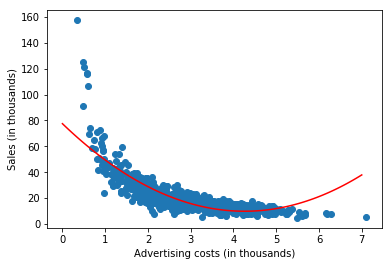

fit:  0.6927446350535892


In [5]:
x = np.array(marketing)
y = np.array(sales)

polyplot = np.poly1d(np.polyfit(x,y,2))

plt.scatter(marketing, sales)

# we will replace the independant variable marketing with sample points (x_range) in its bounds using np.linspace

x_range = np.linspace(0, 7, 100)
plt.plot(x_range, polyplot(x_range), c='r')

plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.show()

r_square = r2_score(y, polyplot(x))

print('fit: ', r_square)

#### Exiting notes
As we can see degree 2 did not give us a good fit. This model will result in poor predictions. This case is called as underfitting.

On the opposite, overfitting may lead to poor predictions as higher the degree, the regression will include all outliers. 

To understand these concepts better, try Changing the degree in polyfit function to get more or less accurate model.

Notes on Overfitting:
- Overfitting is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.
- Do not use more degrees than you need
- Visualize the fit with canges to determine best fit.
- Higher r-squared measure does not mean the better predictor. it only tells us that the curve fits the training data well